In [ ]:
#BERAT BULUT 23040101007 BM 
#https://github.com/bulutberat/makina-renmesifinal

In [ ]:
# Gerekli Kütüphanelerin Yüklenmesi ve Veri Setinin Okunması
#Bu hücrede, projemizde kullanacağımız kütüphaneleri yüklüyoruz ve veri setimizi `pandas` kütüphanesi ile okuyoruz ve ardından veri setini inceliyoruz.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Veri setini okuma
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
data = pd.read_csv('diyabetveriseti.txt', sep='\t', header=None, names=column_names)

# Veri setini inceleme
print(data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
# Veri Setini Eğitim ve Test Olarak Ayırma
#Bu hücrede, veri setimizi %70 eğitim ve %30 test olarak ayırıyoruz.


In [2]:
X = data.drop("Outcome", axis=1)
y = data["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Naive Bayes Sınıflandırıcısı
#Bu hücrede, Naive Bayes sınıflandırıcısını kullanarak bir model oluşturuyoruz ve bu modelin performansını değerlendiriyoruz.


In [3]:
# Naive Bayes Sınıflandırıcısı
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Sonuçları raporlama
print("Naive Bayes Sınıflandırıcı Sonuçları")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Sınıflandırıcı Sonuçları
[[119  32]
 [ 27  53]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



In [ ]:
# K-Nearest Neighbors (KNN) Sınıflandırıcısı
#Bu hücrede, KNN sınıflandırıcısını kullanarak bir model oluşturuyoruz ve bu modelin performansını değerlendiriyoruz. Ayrıca, en iyi k değerini belirliyoruz.


In [4]:
# KNN Sınıflandırıcısı ve en iyi k değerini belirleme
best_k = 1
best_score = 0

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    if score > best_score:
        best_k = k
        best_score = score

# En iyi k değeri ile KNN Sınıflandırıcısı
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Sonuç raporlama kısmı
print(f"K-Nearest Neighbors (KNN) Sınıflandırıcı Sonuçları (k={best_k})")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors (KNN) Sınıflandırıcı Sonuçları (k=13)
[[128  23]
 [ 36  44]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       151
           1       0.66      0.55      0.60        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



In [ ]:
# Multi-Layer Perceptron (MLP) Sınıflandırıcısı
#Bu hücrede, MLP sınıflandırıcısını kullanarak bir model oluşturuyoruz ve bu modelin performansını değerlendiriyoruz.


In [5]:
# MLP Sınıflandırıcısı
mlp = MLPClassifier(random_state=42, max_iter=300)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

# Sonuçları raporlama
print("Multi-Layer Perceptron (MLP) Sınıflandırıcı Sonuçları")
print(confusion_matrix(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))


Multi-Layer Perceptron (MLP) Sınıflandırıcı Sonuçları
[[123  28]
 [ 36  44]]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       151
           1       0.61      0.55      0.58        80

    accuracy                           0.72       231
   macro avg       0.69      0.68      0.69       231
weighted avg       0.72      0.72      0.72       231



In [ ]:
# Support Vector Machines (SVM) Sınıflandırıcısı
# Bu hücrede, SVM sınıflandırıcısını kullanarak bir model oluşturuyoruz ve bu modelin performansını değerlendiriyoruz.


In [6]:
# SVM Sınıflandırıcısı
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Sonuçları raporlama
print("Support Vector Machines (SVM) Sınıflandırıcı Sonuçları")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Support Vector Machines (SVM) Sınıflandırıcı Sonuçları
[[122  29]
 [ 30  50]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.63      0.62      0.63        80

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



In [ ]:
# ROC Eğrisi Çizme ve Karşılaştırma
# Bu hücrede, tüm modellerin ROC eğrilerini çizerek karşılaştırıyoruz.


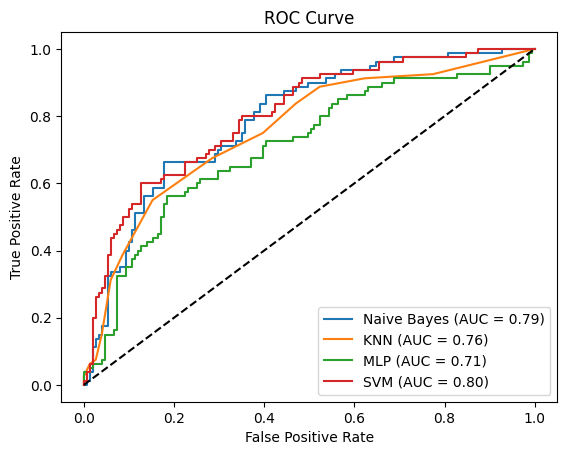

In [7]:
# ROC eğrisi çizme
def plot_roc_curve(y_test, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.figure()
plot_roc_curve(y_test, nb.predict_proba(X_test)[:, 1], "Naive Bayes")
plot_roc_curve(y_test, knn.predict_proba(X_test)[:, 1], "KNN")
plot_roc_curve(y_test, mlp.predict_proba(X_test)[:, 1], "MLP")
plot_roc_curve(y_test, svm.predict_proba(X_test)[:, 1], "SVM")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
